# Titanic - Machine Learning from Disaster

The legendary Titanic ML competition. The first challenge for anyone to dive into ML competitions. 

This is my first kaggle problem. I have created many notebooks with different models and done many submission in the Kaggle. After referring other resources, I have created my final notebook here.

[Click here](https://www.kaggle.com/c/titanic) for the Kaggle link.

## Table of contents
* [Introduction](#introduction)
* [Loading Modules](#modules)
* [Data](#data)
* [Exploratory Data Analysis (EDA)](#eda)
* [Feature Engineering](#feature_engineering)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Submission](#submission)

## Introduction <a name="introduction"></a>

As in the "Table of Contents", first I will explore the data and looks for null values. 

In the "Exploratory Data Analysis" phase, I will be able to compare the survivers to the each features. The following quesions will be answered in this phase.
* How many passengers survived the disaster?
* 

Next, we can apply the feature engineering for both the training and the test data. The feature enginneering helps get more features from the existing features and to improve the model accuracy. In my first submission (for trial), I have created the model witout feature engineering. The model accuracy was very low.  

In the "Analysis" section, we will select only the required features from the training dataset. Once our dataset is ready for the model training, we will apply the following classification algorithms to the training dataset. 
* Logistic Regression
* Support Vector Machines (SVC)
* k-Nearest Neighbor (KNN)
* Decision Tree
* Random Forest
* Naive Bayes (GaussianNB)

To understand the accuracy, I will find both the training accuracy and testing accuracy for each alogrithms. 

In the "Results and Discussion" section, we will do the comparisons of all the models and choose for the kaggle test data. 

In the "Submission" section, the choosen model will be used to predict the survival for the "test" data.

## Loading Modules <a name="modules"></a>

All required modules are imported in the next cell.

In [63]:
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme(style="whitegrid")

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

## Data <a name="data"></a>

We will import both the train and test data at first. All feature engineering will be applied to the test data when applying to the train data.

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

Lets have a look at the training dataset.

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Brief description about each columns:**
1. PassengerId: An unique id for each passengers
2. Survived: Shows if the passenger survived or not. 1 = Survived and 0 Not survived
3. Pclass: Ticket class 1 = First class, 2 = Second class, and 3 = Third class
4. Name: Passenger's name
5. Sex: Passenger's sex \[Male or Female\]
6. Age: Passenger's age
7. SibSp: Number of siblings or spouses aboard the titanic
8. Parch: Number of parents or children aboard the titanic
9. Ticket: Ticket number
10. Fare: Money paid by the passenger the journey
11. Cabin: Cabin number of the passenger
12. Embarked: Port from where the particular passenger was embarked/boarded.

In [4]:
train.shape

(891, 12)

The training dataset contains 891 rows and 12 columns.

#### Summary all columns

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Looks like the following columns contains the null values.
1. Age : 177 null values
2. Cabin: 687 null values
3. Embarked: 2 null values

**Numerical columns:** PassengerId, Survived, Pclass, Age, SibSp, Parch, and Fare

**Categorical columns:** Name, Sex, Ticket, Cabin, and Embarked

#### Numerical columns

In [6]:
train.describe(include = [np.number])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Categorical columns

In [7]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Brown, Miss. Amelia ""Mildred""",male,1601,G6,S
freq,1,577,7,4,644


From the above summary, we can see the following:
1. Out of 891 people, 577 are males and rest are females
2. 644 of them embarked from the port **S**
3. So many values are missing in the cabin column
4. In the ticket, 681 unique values are present.

## Exploratory Data Analysis (EDA) <a name="eda"></a>

#### Survived vs Not survived

In [8]:
survived = train['Survived'].value_counts().to_frame().rename(columns={'Survived':'Count'})
survived['Survived or Not'] = ['Not survived','Survived']
survived

,Count,Survived or Not
0,549,Not survived
1,342,Survived


<AxesSubplot:xlabel='Survived or Not', ylabel='Count'>

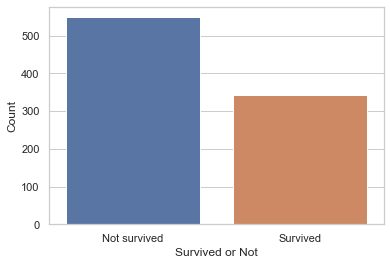

In [9]:
sns.barplot(x='Survived or Not', y='Count', data=survived)

#### Pclass vs Survival

In [10]:
train.groupby('Pclass').Survived.value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [11]:
pclass = train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()
pclass

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

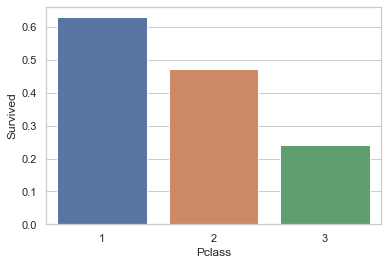

In [12]:
sns.barplot(x='Pclass', y='Survived', data=pclass)

Looks like the first class passengers have better survival chance. 

#### Sex vs Survival

In [13]:
train.groupby('Sex').Survived.value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [14]:
sex = train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

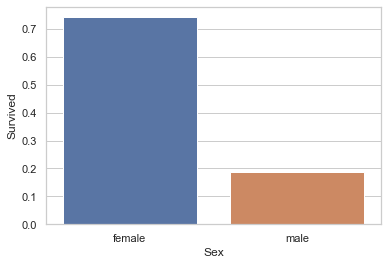

In [15]:
sns.barplot(x='Sex', y='Survived', data=sex)

Females have better survival chance than males.

#### Embarked vs Survival

In [16]:
train.groupby('Embarked').Survived.value_counts()

Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64

In [17]:
embarked = train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean()
embarked

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

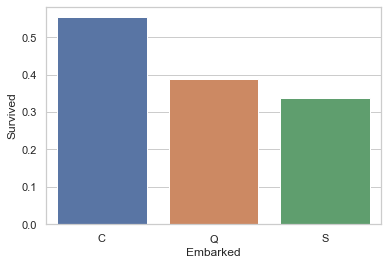

In [18]:
sns.barplot(x='Embarked', y='Survived', data=embarked)

#### Parch vs Survival

In [19]:
train.groupby('Parch').Survived.value_counts()

Parch  Survived
0      0           445
       1           233
1      1            65
       0            53
2      0            40
       1            40
3      1             3
       0             2
4      0             4
5      0             4
       1             1
6      0             1
Name: Survived, dtype: int64

In [20]:
parch = train[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean()
parch

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


<AxesSubplot:xlabel='Parch', ylabel='Survived'>

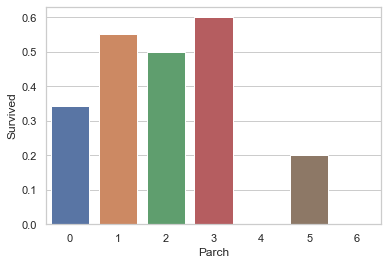

In [21]:
sns.barplot(x='Parch', y='Survived', data=parch)

#### SibSp vs Survival

In [22]:
train.groupby('SibSp').Survived.value_counts()

SibSp  Survived
0      0           398
       1           210
1      1           112
       0            97
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: Survived, dtype: int64

In [23]:
sibsp = train[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean()
sibsp

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

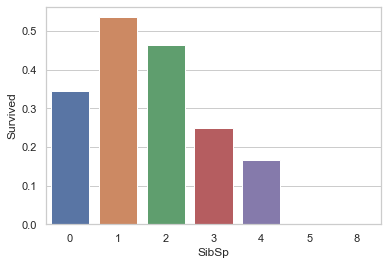

In [24]:
sns.barplot(x='SibSp', y='Survived', data=sibsp)

#### Age vs. Survival

In [25]:
train.groupby('Age').Survived.value_counts()

Age    Survived
0.42   1           1
0.67   1           1
0.75   1           2
0.83   1           2
0.92   1           1
                  ..
70.00  0           2
70.50  0           1
71.00  0           2
74.00  0           1
80.00  1           1
Name: Survived, Length: 142, dtype: int64

## Feature Engineering <a name="feature_engineering"></a>

Before applying feature engineering, let take a look at the test dataset.

In [26]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Lets combine both the dataset to apply feature selection.

In [27]:
train_test_data = [train, test]

#### Column : Name

From the Name column, we can extract the title of the each passenger.

In [28]:
for df in train_test_data:
    df['Title'] = df.Name.str.extract(" ([A-Za-z]+)\.")

In [29]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


Lets see the count categories from Sex column for unique values of Title.

In [30]:
titles=pd.crosstab(train['Title'], train['Sex'])
titles

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


We now replace some less common title with "Other" for both the categories from "Sex" column and covert them into numeric form.

In [31]:
for df in train_test_data:
    df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Major', 'Rev', 'Sir', 'Jonkheer','Dr'], 'Others')
    df['Title'] = df['Title'].replace(['Mlle','Ms','Mme'], 'Miss')

In [32]:
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.704301
2,Mr,0.156673
3,Mrs,0.792000
4,Others,0.347826


In [33]:
for df in train_test_data:
    df['Title'] = df['Title'].map({"Master": 1, "Miss": 2, "Mr": 3,"Mrs": 4, "Other": 5})
    df['Title'] = df['Title'].fillna(0)
    df['Title'] = df['Title'].astype(int)

In [34]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,4
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,4
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,3


#### Column: Sex

Will convert the categorical value into numeric.  
**Male:** 1  
**Female:** 0

In [35]:
for df in train_test_data:
    df['Sex'] = df['Sex'].map( {'male': 1, 'female': 0} ).astype(int)

In [36]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,4
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,4
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,3


#### Column: Embarked

In [37]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [38]:
train['Embarked'].isnull().sum()

2

Look like there only two missing values in this column. Hence, will replace the null values with "S".

In [39]:
for df in train_test_data:
    df['Embarked'] = df['Embarked'].fillna('S')

Will convert the categorical value into numeric.

In [40]:
for df in train_test_data:
    df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)

In [41]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1,4
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0,4
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0,3


#### Column: Age

Here, we are doing two steps.
1. First will fill the null values with the median
2. Categorize the age column in a new column called "AgeRage"

In [42]:
for df in train_test_data:
    df['Age'] = df['Age'].fillna(train['Age'].median())

In [43]:
train['AgeRage'] = pd.cut(train['Age'], 5)

In [44]:
train['AgeRage'].unique()

[(16.336, 32.252], (32.252, 48.168], (48.168, 64.084], (0.34, 16.336], (64.084, 80.0]]
Categories (5, interval[float64]): [(0.34, 16.336] < (16.336, 32.252] < (32.252, 48.168] < (48.168, 64.084] < (64.084, 80.0]]

In [45]:
train[['AgeRage', 'Survived']].groupby(['AgeRage'], as_index=False).mean()

,AgeRage,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.344168
2,"(32.252, 48.168]",0.404255
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


Now we will map 'Age' column to categories as per the AgeRange column.

In [46]:
for df in train_test_data:
    df.loc[ df['Age'] <= 16, 'Age'] = 0
    df.loc[(df['Age'] > 16) & (df['Age'] <= 32), 'Age'] = 1
    df.loc[(df['Age'] > 32) & (df['Age'] <= 48), 'Age'] = 2
    df.loc[(df['Age'] > 48) & (df['Age'] <= 64), 'Age'] = 3
    df.loc[ df['Age'] > 64, 'Age'] = 4

In [47]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeRage
0,1,0,3,"Braund, Mr. Owen Harris",1,1.0,1,0,A/5 21171,7.2500,NaN,0,3,"(16.336, 32.252]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2.0,1,0,PC 17599,71.2833,C85,1,4,"(32.252, 48.168]"
2,3,1,3,"Heikkinen, Miss. Laina",0,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,2,"(16.336, 32.252]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,2.0,1,0,113803,53.1000,C123,0,4,"(32.252, 48.168]"
4,5,0,3,"Allen, Mr. William Henry",1,2.0,0,0,373450,8.0500,NaN,0,3,"(32.252, 48.168]"


In [ ]:
for df in train_test_data:
    df['Age'] = df['Age'].astype(int)

#### Column: Fare

Here, we are doing two steps.
1. First will fill the null values with the median
2. Categorize the age column in a new column called "FareRange"

In [48]:
for df in train_test_data:
    df['Fare'] = df['Fare'].fillna(df['Fare'].median())

In [49]:
train['FareRange'] = pd.qcut(train['Fare'], 4)
train[['FareRange', 'Survived']].groupby(['FareRange'], as_index=False).mean()

,FareRange,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [50]:
for df in train_test_data:
    df.loc[ df['Fare'] <= 7.91, 'Fare'] = 0
    df.loc[(df['Fare'] > 7.91) & (df['Fare'] <= 14.454), 'Fare'] = 1
    df.loc[(df['Fare'] > 14.454) & (df['Fare'] <= 31), 'Fare']   = 2
    df.loc[ df['Fare'] > 31, 'Fare'] = 3
    df['Fare'] = df['Fare'].astype(int)

In [51]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeRage,FareRange
0,1,0,3,"Braund, Mr. Owen Harris",1,1.0,1,0,A/5 21171,0,NaN,0,3,"(16.336, 32.252]","(-0.001, 7.91]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2.0,1,0,PC 17599,3,C85,1,4,"(32.252, 48.168]","(31.0, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",0,1.0,0,0,STON/O2. 3101282,1,NaN,0,2,"(16.336, 32.252]","(7.91, 14.454]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,2.0,1,0,113803,3,C123,0,4,"(32.252, 48.168]","(31.0, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",1,2.0,0,0,373450,1,NaN,0,3,"(32.252, 48.168]","(7.91, 14.454]"


#### Columns: SibSp & Parch

Will create a new column called "FamilySize" using the feature SibSp and Parch

In [52]:
for df in train_test_data:
    df['FamilySize'] = df['SibSp'] +  df['Parch'] + 1

In [53]:
train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean()

,FamilySize,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


## Methodology <a name="methodology"></a>

Following columns will be dropped as they are not usefull for the training.

In [54]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title', 'AgeRage',
       'FareRange', 'FamilySize'],
      dtype='object')

In [55]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title', 'FamilySize'],
      dtype='object')

In [61]:
features = ['Pclass', 'Sex', 'Age', 'Fare', 'Title']

In [62]:
X = train[features]
y = train['Survived']

#### Train Test Split for Accuracy Check

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=20)

## Analysis <a name="analysis"></a>

For this problem, we will choose the following Classification algorithms:

* Logistic Regression
* Support Vector Machines (SVC)
* k-Nearest Neighbor (KNN)
* Decision Tree
* Random Forest
* Naive Bayes (GaussianNB)

First, we will test the model using the test set from the train data.

#### Logistic Regression

In [77]:
classifier_lr = LogisticRegression()
classifier_lr.fit(X_train, y_train)
y_pred_lr = classifier_lr.predict(X_test)
accuracy_lr_train = classifier_lr.score(X_train, y_train)
accuracy_lr_test = accuracy_score(y_test, y_pred_lr)
print("Training accuracy: {:.2f}.".format(accuracy_lr_train))
print("Testing accuracy: {:.2f}.".format(accuracy_lr_test))

The training accuracy for Logistic Regression is 0.80.
The testing accuracy for Logistic Regression is 0.76.


### Support Vector Machine (SVM)

In [78]:
classifier_svm = SVC()
classifier_svm.fit(X_train, y_train)
y_pred_svm = classifier_svm.predict(X_test)
accuracy_svm_train = classifier_svm.score(X_train, y_train)
accuracy_svm_test = accuracy_score(y_test, y_pred_svm)
print("Training accuracy: {:.2f}.".format(accuracy_svm_train))
print("Testing accuracy: {:.2f}.".format(accuracy_svm_test))

The training accuracy for Support Vector Machine is 0.83.
The testing accuracy for Support Vector Machine is 0.80.


### k-Nearest Neighbor (KNN)

In [79]:
classifier_knn = KNeighborsClassifier(n_neighbors = 5)
classifier_knn.fit(X_train, y_train)
y_pred_knn = classifier_knn.predict(X_test)
accuracy_knn_train = classifier_knn.score(X_train, y_train)
accuracy_knn_test = accuracy_score(y_test, y_pred_knn)
print("Training accuracy: {:.2f}.".format(accuracy_knn_train))
print("Testing accuracy: {:.2f}.".format(accuracy_knn_test))

The training accuracy for k-Nearest Neighbor is 0.84.
The testing accuracy for k-Nearest Neighbor is 0.78.


#### Decision Tree

In [80]:
classifier_dt = DecisionTreeClassifier()
classifier_dt.fit(X_train, y_train)
y_pred_dt = classifier_dt.predict(X_test)
accuracy_dt_train = classifier_dt.score(X_train, y_train)
accuracy_dt_test = accuracy_score(y_test, y_pred_dt)
print("Training accuracy: {:.2f}.".format(accuracy_dt_train))
print("Testing accuracy: {:.2f}.".format(accuracy_dt_test))

The training accuracy for k-Nearest Neighbor is 0.86.
The testing accuracy for k-Nearest Neighbor is 0.80.


#### Random Forest

In [81]:
classifier_rf = RandomForestClassifier(n_estimators=100)
classifier_rf.fit(X_train, y_train)
y_pred_rf = classifier_rf.predict(X_test)
accuracy_rf_train = classifier_dt.score(X_train, y_train)
accuracy_rf_test = accuracy_score(y_test, y_pred_rf)
print("Training accuracy: {:.2f}.".format(accuracy_rf_train))
print("Testing accuracy: {:.2f}.".format(accuracy_rf_test))

Training accuracy: 0.86.
Testing accuracy: 0.80.


#### Gaussian Naive Bayes

In [82]:
classifier_gnb = RandomForestClassifier(n_estimators=100)
classifier_gnb.fit(X_train, y_train)
y_pred_gnb = classifier_gnb.predict(X_test)
accuracy_gnb_train = classifier_gnb.score(X_train, y_train)
accuracy_gnb_test = accuracy_score(y_test, y_pred_gnb)
print("Training accuracy: {:.2f}.".format(accuracy_gnb_train))
print("Testing accuracy: {:.2f}.".format(accuracy_gnb_test))

Training accuracy: 0.86.
Testing accuracy: 0.81.


## Results and Discussion <a name="results"></a>

## Submission <a name="submission"></a>